In [1]:
# Importing the necessary librararies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# Import the dataset

In [4]:
data = pd.read_csv("D:\Data science\Assignments docs\Decision tree\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.shape

(600, 6)

In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
# Unique values in each column

In [8]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [9]:
# Converting the continuous values of "Taxable.Income" into categorial values of "Risky" and "Good"

In [10]:
frd = pd.cut(data["Taxable.Income"], bins=[0,30000,100000],labels =["Risky","Good"])

In [11]:
# Combining the converted values into the original dataset and removing earlier column

In [12]:
data.insert(1,'Tax_income',frd)
data= data.iloc[:,[0,1,2,4,5,6]]
data.head()

,Undergrad,Tax_income,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Good,Single,50047,10,YES
1,YES,Good,Divorced,134075,18,YES
2,NO,Good,Married,160205,30,YES
3,YES,Good,Single,193264,15,YES
4,NO,Good,Married,27533,28,NO


## Data exploration

In [13]:
import seaborn as sns

In [14]:
# Value counts

In [15]:
data.Tax_income.value_counts()

Good     476
Risky    124
Name: Tax_income, dtype: int64

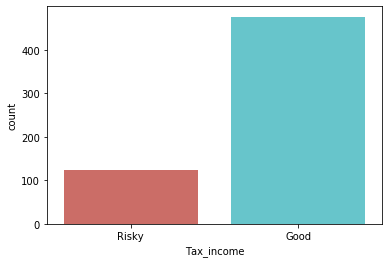

In [16]:
sns.countplot(data["Tax_income"], palette="hls")

In [17]:
# Counts for "Good" taxable income is very high compared to "Risky" counts

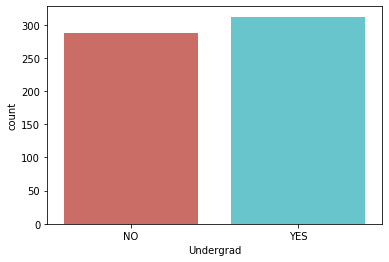

In [18]:
sns.countplot(data["Undergrad"], palette="hls")

In [19]:
# Counts for customers with Undergraduation are relatively high compared to the customers without undergraduation 

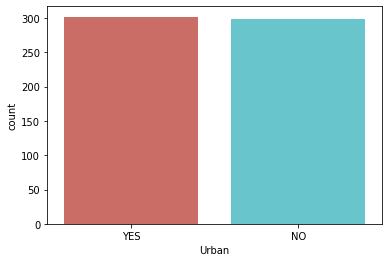

In [20]:
sns.countplot(data["Urban"], palette="hls")

In [21]:
# Population from urban and non_urban is almost same

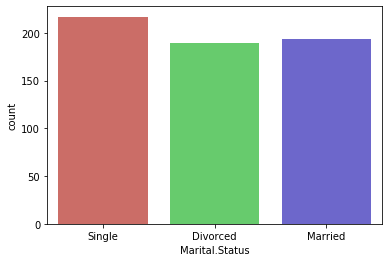

In [22]:
sns.countplot(data["Marital.Status"], palette="hls")

In [23]:
# Marital status of most of the customers are single and others being Married or Divorced

{'whiskers': [<matplotlib.lines.Line2D at 0x23d713969c8>,
 'caps': [<matplotlib.lines.Line2D at 0x23d7139b988>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d71390f48>],
 'medians': [<matplotlib.lines.Line2D at 0x23d713a0908>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d713a0f48>],
 'means': []}

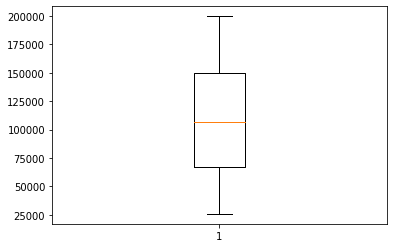

In [24]:
plt.boxplot(data["City.Population"])

In [25]:
# The city population has a range of 25000 to 200000 with mean popluation being near 110000

{'whiskers': [<matplotlib.lines.Line2D at 0x23d71408cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x23d7140bc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d71408288>],
 'medians': [<matplotlib.lines.Line2D at 0x23d71411c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d71411d08>],
 'means': []}

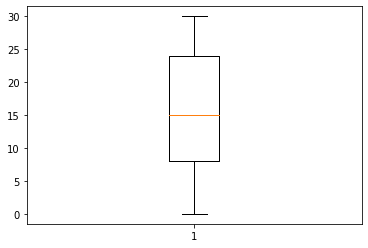

In [26]:
plt.boxplot(data["Work.Experience"])

In [27]:
# Work experience of the customers vary from 0 years to 30 years, with mean experience being 15 years

In [28]:
# Obtaining the dummy variables for 'Undergrad','Marital.Status','Urban'

In [29]:
data = pd.get_dummies(data, columns =['Undergrad','Marital.Status','Urban'],drop_first=True)
data.head()

,Tax_income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0


In [30]:
# Checking for any NA values

In [31]:
data.isna().sum()

Tax_income                0
City.Population           0
Work.Experience           0
Undergrad_YES             0
Marital.Status_Married    0
Marital.Status_Single     0
Urban_YES                 0
dtype: int64

In [32]:
# No NA values in the dataset

In [33]:
data.shape

(600, 7)

In [34]:
# Divivng the data into X and Y i.e. predictors and target

In [35]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [36]:
# Splitting the data into training and testing dataset

In [37]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2)

## Decision tree classifier

In [38]:
# Building the Decision tree model with "entropy" as criterion

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [40]:
model = DecisionTreeClassifier(criterion="entropy")

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
# Predicting the target values using the model

In [43]:
y_pred = model.predict(x_test)
y_pred

array(['Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'G

In [44]:
# Value counts of predicted values

In [45]:
pd.Series(y_pred).value_counts()

Good     96
Risky    24
dtype: int64

In [46]:
# Buliding confusion matrix

In [47]:
confusion_matrix(y_pred, y_test)

array([[79, 17],
       [22,  2]], dtype=int64)

In [48]:
# Accuracy of the model

In [49]:
Accuracy_entropy = accuracy_score(y_pred,y_test)
Accuracy_entropy

0.675

In [50]:
# Using the Decision tree model again but using the "gini" as criterion

In [51]:
model1 = DecisionTreeClassifier(criterion="gini")

In [52]:
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
# Predicting the target values using the model

In [54]:
y_pred1 = model1.predict(x_test)
y_pred1

array(['Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Ris

In [55]:
# Value counts of predicted values

In [56]:
pd.Series(y_pred1).value_counts()

Good     90
Risky    30
dtype: int64

In [57]:
# Buliding the confusion matrix

In [58]:
confusion_matrix(y_pred1, y_test)

array([[74, 16],
       [27,  3]], dtype=int64)

In [59]:
# Visualizing the Decision tree

[Text(582.4649572095436, 531.2454545454545, 'X[1] <= 24.5\ngini = 0.342\nsamples = 480\nvalue = [375, 105]'),
 Text(442.5398729253112, 506.53636363636366, 'X[0] <= 197770.0\ngini = 0.361\nsamples = 377\nvalue = [288, 89]'),
 Text(324.18555497925314, 481.82727272727277, 'X[1] <= 17.5\ngini = 0.355\nsamples = 372\nvalue = [286, 86]'),
 Text(166.48832987551867, 457.1181818181818, 'X[1] <= 2.5\ngini = 0.327\nsamples = 277\nvalue = [220, 57]'),
 Text(48.622406639004154, 432.40909090909093, 'X[0] <= 173412.5\ngini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(34.73029045643153, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(27.78423236514523, 382.9909090909091, 'X[0] <= 82679.5\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(20.83817427385892, 358.28181818181815, 'X[0] <= 78808.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(13.892116182572614, 333.5727272727273, 'X[0] <= 31559.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(6.94605

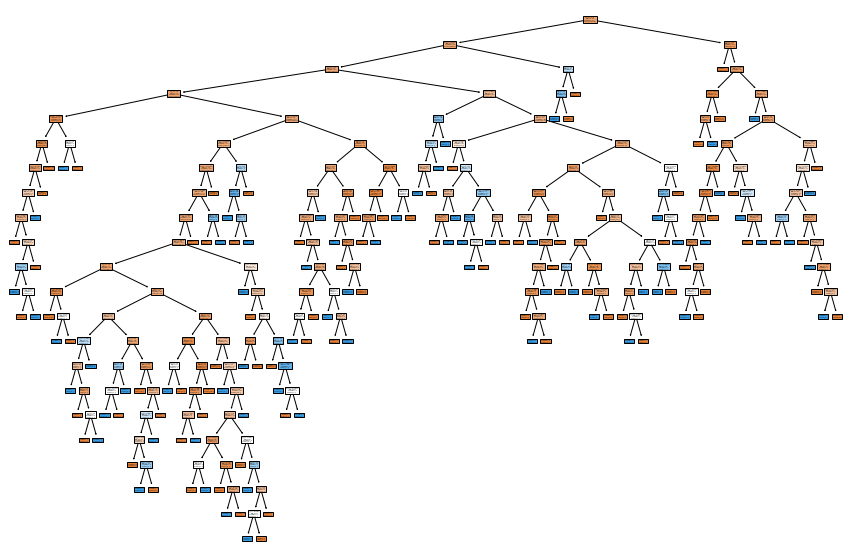

In [60]:
plt.figure(figsize=(15,10))
tree.plot_tree(model1, filled=True)

In [61]:
# Accuracy of the model

In [62]:
Accuracy_gini = accuracy_score(y_pred1,y_test)
Accuracy_gini

0.6416666666666667

In [63]:
# Checking the accuracy of the model with different max_depth values from 3 to 10

In [64]:
# List of values to try for max_depth:
max_depth_range = list(range(3, 10))                   # List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion="entropy",max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)    
    score = clf.score(x_test, y_test)
    accuracy.append(score)

In [65]:
accuracy

[0.8416666666666667,
 0.825,
 0.7916666666666666,
 0.7833333333333333,
 0.7833333333333333,
 0.8,
 0.7916666666666666]

In [66]:
# The maximum accuracy can be obtained with max_depth as 3

In [67]:
# Changing the max_depth to 3 and building the model

In [68]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [69]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [70]:
# Predicting the target value using the model

In [71]:
y_pred2= model2.predict(x_test)
y_pred2

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [72]:
# Confusion matrix

In [73]:
confusion_matrix(y_pred2,y_test)

array([[101,  19],
       [  0,   0]], dtype=int64)

In [74]:
# Visualizing the Decision tree

[Text(453.375, 475.65000000000003, 'X[1] <= 24.5\nentropy = 0.758\nsamples = 480\nvalue = [375, 105]'),
 Text(279.0, 339.75, 'X[1] <= 2.5\nentropy = 0.788\nsamples = 377\nvalue = [288, 89]'),
 Text(139.5, 203.85000000000002, 'X[4] <= 0.5\nentropy = 0.513\nsamples = 35\nvalue = [31, 4]'),
 Text(69.75, 67.94999999999999, 'entropy = 0.65\nsamples = 24\nvalue = [20, 4]'),
 Text(209.25, 67.94999999999999, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(418.5, 203.85000000000002, 'X[0] <= 37812.5\nentropy = 0.809\nsamples = 342\nvalue = [257, 85]'),
 Text(348.75, 67.94999999999999, 'entropy = 0.971\nsamples = 25\nvalue = [15, 10]'),
 Text(488.25, 67.94999999999999, 'entropy = 0.789\nsamples = 317\nvalue = [242, 75]'),
 Text(627.75, 339.75, 'X[1] <= 25.5\nentropy = 0.623\nsamples = 103\nvalue = [87, 16]'),
 Text(558.0, 203.85000000000002, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(697.5, 203.85000000000002, 'X[0] <= 65500.0\nentropy = 0.689\nsamples = 87\nvalue = [71, 16]')

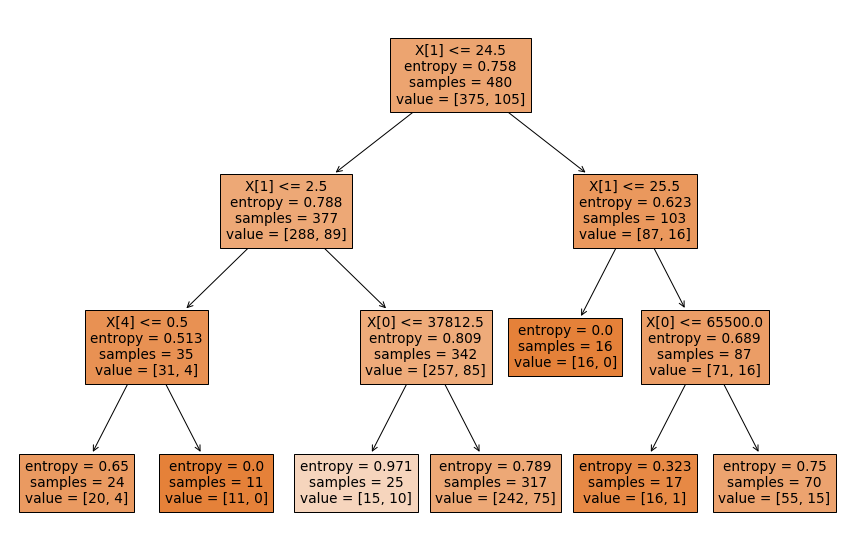

In [75]:
plt.figure(figsize=(15,10))
tree.plot_tree(model2, filled=True)

In [76]:
# Accuracy 

In [77]:
Accuracy_depth3 = accuracy_score(y_pred2,y_test)
Accuracy_depth3

0.8416666666666667

In [78]:
# Improving the accuracy of the model using "bagging" and "boosting" techniques

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Bagging

In [80]:
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0, n_estimators=20)

In [81]:
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [82]:
Accuracy_bag =bg.score(x_test, y_test)
Accuracy_bag

0.8083333333333333

In [83]:
# Bagging technique hasn't increased the accuracy of the model much

## Boosting

In [84]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50,learning_rate=1)

In [85]:
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1)

In [86]:
Accuracy_boost =ada.score(x_test, y_test)
Accuracy_boost

0.6166666666666667

In [87]:
# Boosting technique hasn't increased the accuracy of the model much

In [88]:
# Tabulating all the results

In [89]:
accuracies = {"Method":pd.Series(["Decisiontree_entropy","Decisiontree_gini","Decisiontree_entropy_depth3","Bagging","Boosting"]),"Accuracy_values":(Accuracy_entropy,Accuracy_gini,Accuracy_depth3,Accuracy_bag,Accuracy_boost)}

In [90]:
table_accuracies = pd.DataFrame(accuracies)
table_accuracies

,Method,Accuracy_values
0,Decisiontree_entropy,0.675000
1,Decisiontree_gini,0.641667
2,Decisiontree_entropy_depth3,0.841667
3,Bagging,0.808333
4,Boosting,0.616667


## Observations

In [91]:
# The DecisionTree model with "entropy" criterion and with max_depth of 3 has given the highest accuracy of 84.1 % amongst all
# Bagging(Bootstrapping) technique has also increased the accuracy of the model to 80.8 %